In [1]:
import torch
from torch import nn

torch.__version__

'2.1.1'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory is already exists. Skipping download")
else:
    print(f"{image_path} does not exists. Creating one")
    image_path.mkdir(parents=True, exist_ok=True)
    
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza steak sushi data....")
        f.write(request.content)

    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping the data...")
        zip_ref.extractall(image_path)
    print("Finished")

data/pizza_steak_sushi does not exists. Creating one
Unzipping the data...


In [6]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}. ")

In [7]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi. 
There are 3 directories and 0 images in data/pizza_steak_sushi/test. 
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak. 
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi. 
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza. 
There are 3 directories and 0 images in data/pizza_steak_sushi/train. 
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak. 
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi. 
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza. 


In [8]:
train_dir = image_path / "train"
test_dir = image_path / "test"

steak
Random image path: data/pizza_steak_sushi/train/steak/1624747.jpg
Image class: steak
Image height: 341
Image width: 512


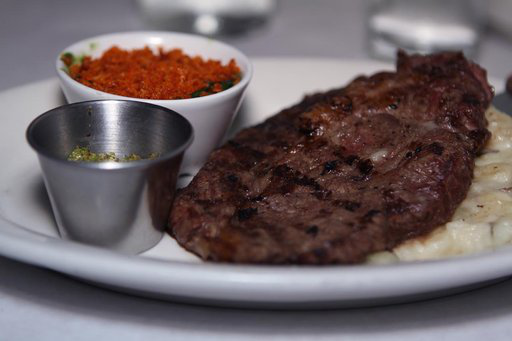

In [14]:
import random
from PIL import Image

#random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem
print(image_class)

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 340.5, -0.5)

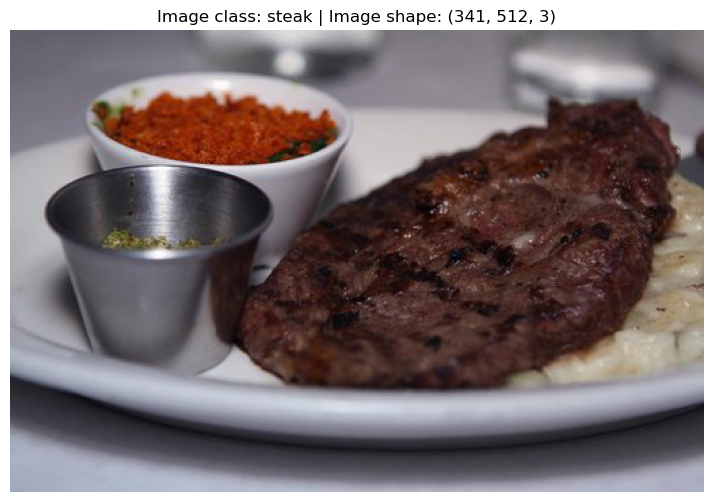

In [15]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10,6))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape}")
plt.axis(False)

In [16]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [20]:
data_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [22]:
data_transform(img).shape

torch.Size([3, 224, 224])

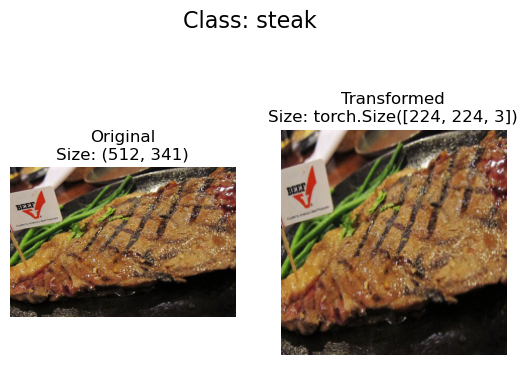

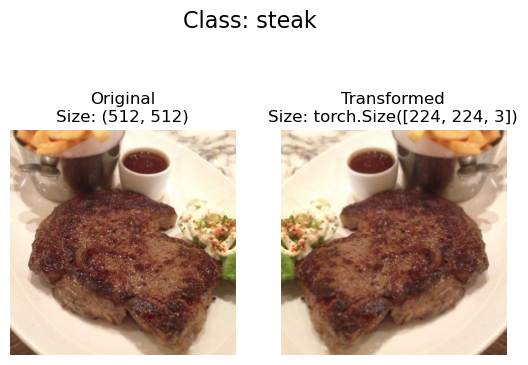

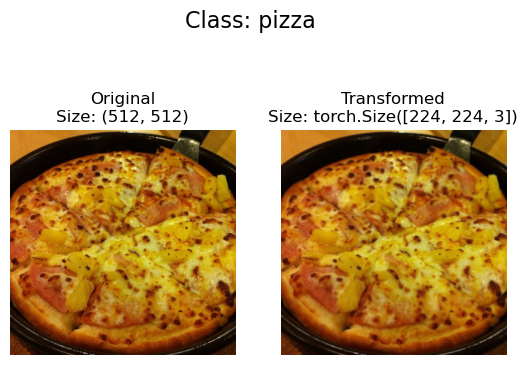

In [28]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)
            
            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
            ax[1].axis("off")
            
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,data_transform)

In [29]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

In [30]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [31]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [32]:
img, label = train_data[0][0], train_data[0][1]

In [ ]:
img_permute = img.permute(1,2,0)

plt.figure(figsize=(10,6))
plt.imshow(img_permute)
plt.axis("off")
plt.title()